In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame

In [2]:
from sklearn.svm import SVC,SVR,LinearSVC,LinearSVR
import scipy.io as spio
from sklearn.datasets import make_blobs

1、使用不同核对下面三个数据集进行分类，并画出分类边界
ex6data1.mat
ex6data2.mat
ex6data3.mat



​

In [110]:
data1 = spio.loadmat('./data/SVM/ex6data1.mat')
data2 = spio.loadmat('./data/SVM/ex6data2.mat')
data3 = spio.loadmat('./data/SVM/ex6data3.mat')

In [28]:
data3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [111]:
X_data1,y_data1 = data1['X'],data1['y'].ravel()
X_data2,y_data2 = data2['X'],data2['y'].ravel()
X_data3,y_data3 = data3['X'],data3['y'].ravel()

In [112]:
display(X_data1.shape,y_data1.shape)

(51, 2)

(51,)

In [113]:
display(X_data2.shape,y_data2.shape)

(863, 2)

(863,)

In [114]:
display(X_data3.shape,y_data3.shape)

(211, 2)

(211,)

In [127]:
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel = 'poly')
svc_L = LinearSVC()

In [128]:
# 训练
def fit_data(X_data,y_data):
    svc_linear.fit(X_data,y_data)
    svc_rbf.fit(X_data,y_data)
    svc_poly.fit(X_data,y_data)
    svc_L.fit(X_data,y_data)

In [175]:
# 生成测试数据
def create_text(X_data):
    x = np.linspace(X_data[:,0].min(),X_data[:,0].max(),100)
    y = np.linspace(X_data[:,1].min(),X_data[:,1].max(),100)
    X,Y = np.meshgrid(x,y)
    return np.c_[X.ravel(),Y.ravel()],x,y

In [130]:
# 生成预测结果
def predict_list(XY):
    y_data1_linear = svc_linear.predict(XY)
    y_data1_rbf = svc_rbf.predict(XY)
    y_data1_poly = svc_poly.predict(XY)
    y_data1_L = svc_L.predict(XY)
    return [y_data1_linear,y_data1_rbf,y_data1_poly,y_data1_L]

In [185]:
# 画图
def draw(x,y,X_data,y_data,predict_list,suptitle):
    name_list = ['svc linear', 'svc rbf', 'svc poly', 'svc LinearSV']
    plt.figure(figsize=(12,9))
    for i,predict in enumerate(predict_list):
        axes = plt.subplot(2,2,i+1)
        axes.pcolormesh(x,y,predict.reshape((100,100)))
        plt.scatter(X_data[:,0],X_data[:,1],c=y_data,cmap='rainbow')
        axes.set_title(name_list[i], fontdict=dict(fontsize=20))
        axes.axis('off')
    plt.suptitle(suptitle, fontsize=30)

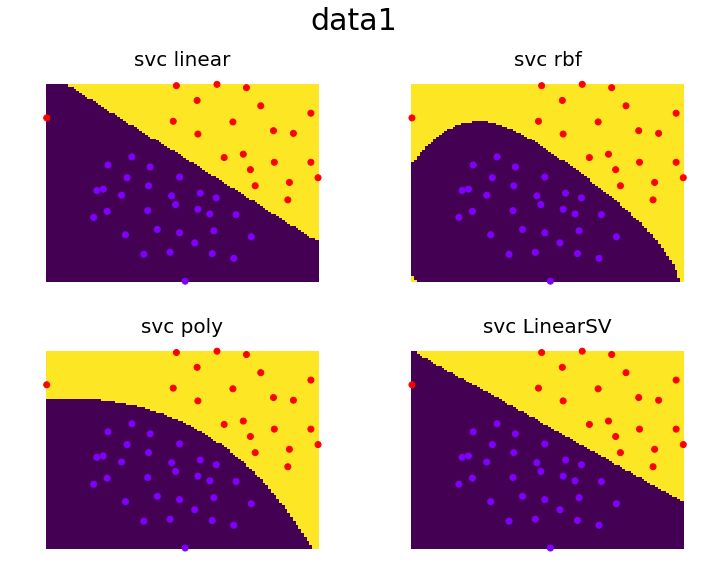

In [186]:
fit_data(X_data1,y_data1)
XY1,x,y = create_text(X_data1)
list1 = predict_list(XY1)
draw(x,y,X_data1,y_data1,list1,'data1')

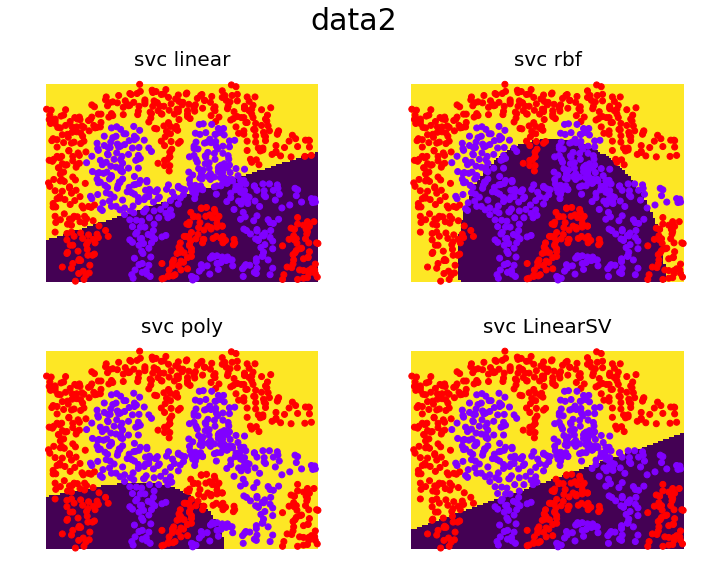

In [192]:
fit_data(X_data2,y_data2)
XY2,x,y = create_text(X_data2)
list2 = predict_list(XY2)
draw(x,y,X_data2,y_data2,list2,'data2')

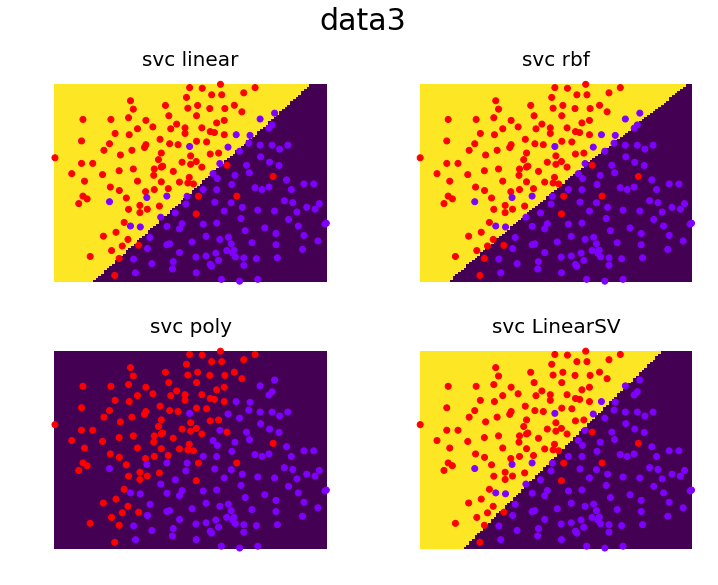

In [194]:
fit_data(X_data3,y_data3)
XY3,x,y = create_text(X_data3)
list3 = predict_list(XY3)
draw(x,y,X_data3,y_data3,list3,'data3')

2、使用SVC对cars.txt进行分析

​
这是一个关于汽车测评的数据集，类别变量为汽车的测评，（unacc，ACC，good，vgood）分别代表（不可接受，可接受，好，非常好），而6个属性变量分别为「买入价」，「维护费」，「车门数」，「可容纳人数」，「后备箱大小」，「安全性」。值得一提的是6个属性变量全部是有序类别变量，比如「可容纳人数」值可为「2，4，more」，「安全性」值可为「low, med, high」

price、maint、doors、persons、lug_boot、safty、recommend

In [5]:
cars = pd.read_csv('cars.txt',header=None)

In [6]:
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
target = cars[6]

In [9]:
data = cars.loc[:,:5]

In [256]:
data.shape

(1728, 6)

In [257]:
data.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [11]:
# str 转 int 
for col in data.columns:
    uni = data[col].unique()
    def convert(item):
        return np.argwhere(uni==item)[0,0]
    data.loc[:,col] = data[col].map(convert)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [260]:
data.tail()

,0,1,2,3,4,5
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1
1727,3,3,3,2,2,2


In [261]:
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel = 'poly')
svc_L = LinearSVC()

In [262]:
from sklearn.model_selection import train_test_split

In [295]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.1)

In [296]:
svc_linear.fit(X_train,y_train).score(X_train,y_train)

0.8585209003215434

In [297]:
svc_rbf.fit(X_train,y_train).score(X_train,y_train)

0.9781350482315112

In [298]:
svc_poly.fit(X_train,y_train).score(X_train,y_train)

0.9813504823151126

In [299]:
svc_L.fit(X_train,y_train).score(X_train,y_train)

0.7987138263665595

In [300]:
y_linear = svc_linear.predict(X_test)
y_rbf = svc_rbf.predict(X_test)
y_poly = svc_poly.predict(X_test)
y_L = svc_L.predict(X_test)

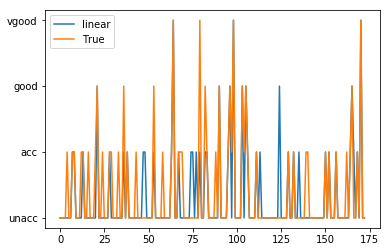

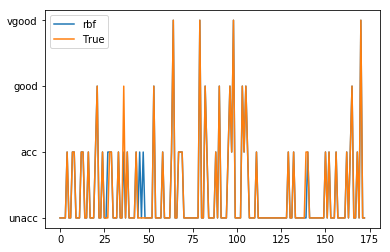

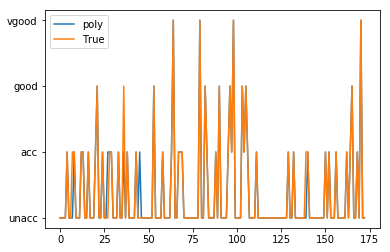

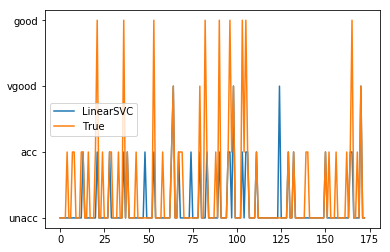

In [310]:
plt.plot(y_linear,label='linear')
plt.plot(y_test.values,label='True')
plt.legend()
plt.show()
plt.plot(y_rbf,label='rbf')
plt.plot(y_test.values,label='True')
plt.legend()
plt.show()
plt.plot(y_poly,label='poly')
plt.plot(y_test.values,label='True')
plt.legend()
plt.show()
plt.plot(y_L,label='LinearSVC')
plt.plot(y_test.values,label='True')
plt.legend()
plt.show()


In [312]:
pd.crosstab(y_linear,y_test,margins=True,rownames='P',colnames='T')

T,acc,good,unacc,vgood,All
P,,,,,
acc,18,3,8,1,30
good,0,6,1,0,7
unacc,17,0,116,0,133
vgood,0,0,0,3,3
All,35,9,125,4,173
